In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

    chunk_size  overlap  processing_time_ms  redis_indexing_time_ms  \
0        200.0      0.0        57878.785038              326.605368   
1        200.0     50.0        43857.905531              267.770195   
2        200.0    100.0        42712.053823              289.064407   
3        500.0      0.0        46840.192461              283.716679   
4        500.0     50.0        47586.981964              258.725405   
5        500.0    100.0        44526.451874              290.223026   
6       1000.0      0.0        48771.789885              336.790371   
7       1000.0     50.0        50988.018894              281.532192   
8       1000.0    100.0        44639.588690              303.438377   
9       2000.0      0.0        40689.465237              282.580996   
10      2000.0     50.0        40672.258520              252.568150   
11      2000.0    100.0        48632.325172              296.763849   

    redis_query_time_ms  memory_usage_mb  
0              6.131172       189

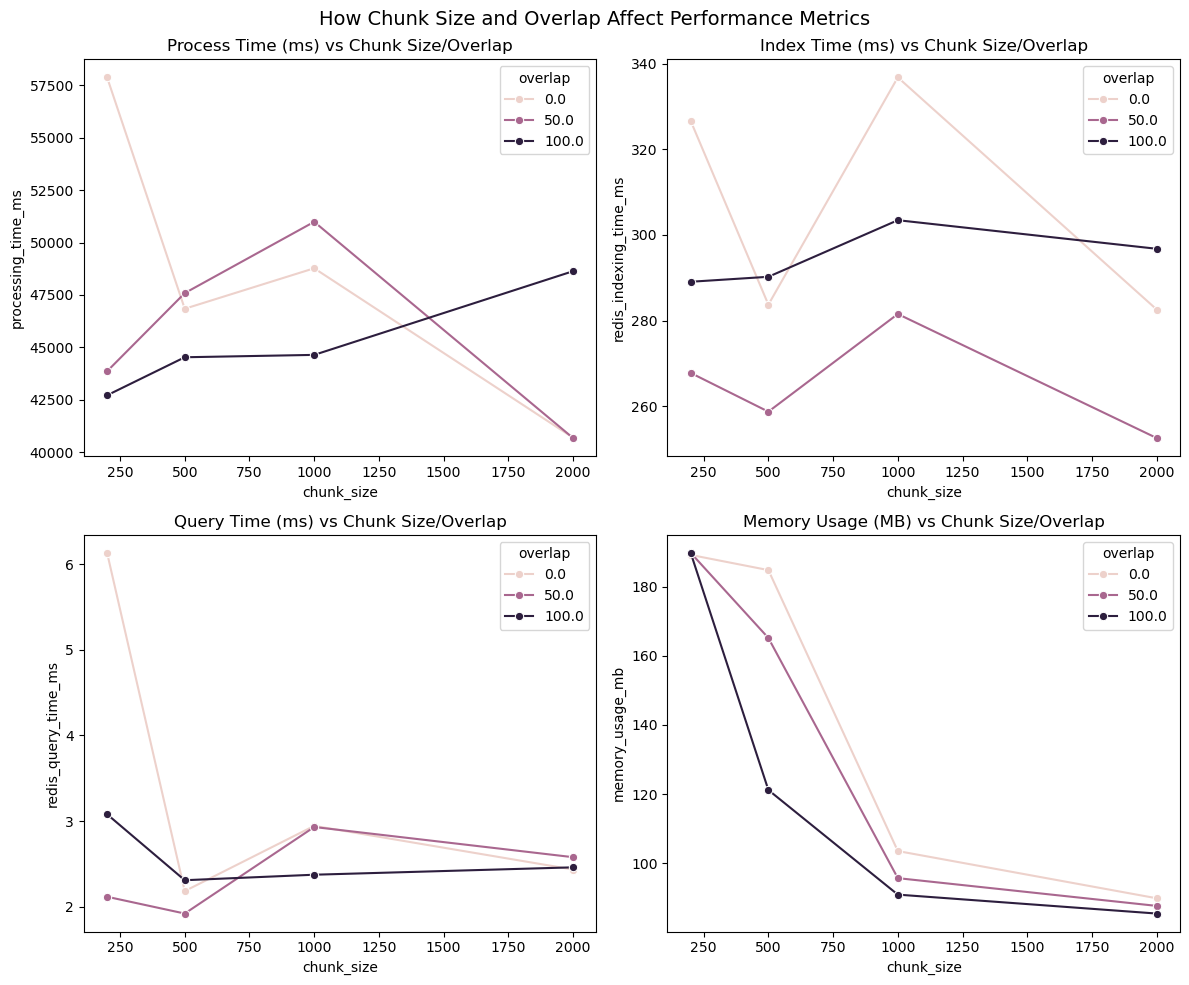

In [ ]:
df = pd.read_csv("chunk_size.csv")

df["processing_time_ms"] = pd.to_numeric(df["processing_time_ms"], errors="coerce")
df["redis_indexing_time_ms"]   = pd.to_numeric(df["redis_indexing_time_ms"], errors="coerce")
df["redis_query_time_ms"]   = pd.to_numeric(df["redis_query_time_ms"], errors="coerce")
df["memory_usage_mb"]    = pd.to_numeric(df["memory_usage_mb"], errors="coerce")


df_avg = (
    df
    .groupby(["chunk_size", "overlap"], as_index=False)[["processing_time_ms", "redis_indexing_time_ms", "redis_query_time_ms", "memory_usage_mb"]]
    .mean()
    .sort_values(["chunk_size", "overlap"])
)

print(df_avg)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("How Chunk Size and Overlap Affect Performance Metrics", fontsize=14)

# Process Time
sns.lineplot(
    data=df_avg,
    x="chunk_size", y="processing_time_ms",
    hue="overlap", marker="o",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Process Time (ms) vs Chunk Size/Overlap")

# Index Time
sns.lineplot(
    data=df_avg,
    x="chunk_size", y="redis_indexing_time_ms",
    hue="overlap", marker="o",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Index Time (ms) vs Chunk Size/Overlap")

# Query Time
sns.lineplot(
    data=df_avg,
    x="chunk_size", y="redis_query_time_ms",
    hue="overlap", marker="o",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Query Time (ms) vs Chunk Size/Overlap")

# Memory Usage
sns.lineplot(
    data=df_avg,
    x="chunk_size", y="memory_usage_mb",
    hue="overlap", marker="o",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Memory Usage (MB) vs Chunk Size/Overlap")

plt.tight_layout()
plt.show()
